In [1]:
import pandas as pd 
import yfinance as yf
import datetime
import numpy as np
import bs4 as bs
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import urlopen
import pandas as pd
import numpy as np
import time
import re
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
symbol = input('Please enter ticker of firm to analyze: ')
start = input('Please enter start date to analyze in format "YYYY-MM-DD": ')
end = input('Please enter end date to analyze in format "YYYY-MM-DD": ')
freq = input('Please enter frequency of returns to analyze (i.e.,  1d, 5d, 1wk, 1mo, 3mo: ')
debt_structure= input('Please input debt structure: constant debt or constant D/E')
riskfree= input('Please input the risk free rate')
marketreturn=input('Please input the market return rate')
tax_rate= 0.21
#need exception h}andling if there are nans

Please enter ticker of firm to analyze: AAPL
Please enter start date to analyze in format "YYYY-MM-DD": 2010-12-31
Please enter end date to analyze in format "YYYY-MM-DD": 2020-12-31
Please enter frequency of returns to analyze (i.e.,  1d, 5d, 1wk, 1mo, 3mo: 1mo
Please input debt structure: constant debt or constant D/Econstant debt
Please input the risk free rate5
Please input the market return rate7


In [3]:
riskfree= (float(riskfree))
marketreturn= (float(riskfree))

In [4]:
data = yf.download(f'{symbol} ^IRX',start = start,end=end,interval = freq)
data

[*********************100%***********************]  2 of 2 completed


Adj Close              Close               High         \
                  AAPL   ^IRX        AAPL   ^IRX        AAPL   ^IRX   
Date                                                                  
2011-01-01   10.390039  0.145   12.118571  0.145   12.450000  0.160   
2011-02-01   10.815357  0.135   12.614643  0.135   13.032143  0.155   
2011-03-01   10.671437  0.090   12.446786  0.090   12.916786  0.140   
2011-04-01   10.721047  0.040   12.504643  0.040   12.683214  0.090   
2011-05-01   10.650619  0.040   12.422500  0.040   12.565357  0.055   
...                ...    ...         ...    ...         ...    ...   
2020-08-31         NaN    NaN         NaN    NaN         NaN    NaN   
2020-09-01  114.902199  0.085  115.809998  0.085  137.979996  0.110   
2020-10-01  108.006676  0.083  108.860001  0.083  125.389999  0.100   
2020-11-01  118.116806  0.075  119.050003  0.075  121.989998  0.095   
2020-12-01  131.877014  0.065  132.690002  0.065  138.789993  0.090   

                   Low               Open               Volume       
                  AAPL   ^IRX        AAPL   ^IRX          AAPL ^IRX  
Date                                                                 
2011-01-01   11.601429  0.110   11.630000  0.135  1.084154e+10  0.0  
2011-02-01   12.061429  0.075   12.189286  0.150  9.295950e+09  0.0  
2011-03-01   11.652143  0.060   12.695357  0.140  1.130646e+10  0.0  
2011-04-01   11.434286  0.015   12.539643  0.045  9.253829e+09  0.0  
2011-05-01   11.765000  0.005   12.490714  0.040  6.912060e+09  0.0  
...                ...    ...         ...    ...           ...  ...  
2020-08-31         NaN    NaN         NaN    NaN           NaN  NaN  
2020-09-01  103.099998  0.075  132.759995  0.100  3.885245e+09  0.0  
2020-10-01  107.720001  0.080  117.639999  0.088  2.894666e+09  0.0  
2020-11-01  107.320000  0.048  109.110001  0.083  2.123077e+09  0.0  
2020-12-01  120.010002  0.060  121.010002  0.080  2.322190e+09  0.0  

[131 rows x 12 columns]

In [5]:
data.dropna(axis=0,how='all',inplace=True)
data = pd.DataFrame(data)
data = pd.DataFrame(data['Close'])
data[:5]

,AAPL,^IRX
Date,,
2011-01-01,12.118571,0.145
2011-02-01,12.614643,0.135
2011-03-01,12.446786,0.090
2011-04-01,12.504643,0.040
2011-05-01,12.422500,0.040


In [6]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
df = first_table

In [7]:
df.head()


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [8]:
df2=df[df['Symbol']==symbol]
sector=df2['GICS Sector'].squeeze()
sector

'Information Technology'

In [9]:
df3=df[df['GICS Sector']==sector].sample(n=5)
df3

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
385,PTC,PTC,reports,Information Technology,Application Software,"Boston, Massachusetts",2021-04-20,857005,1985
119,CTSH,Cognizant Technology Solutions,reports,Information Technology,IT Consulting & Other Services,"Teaneck, New Jersey",2006-11-17,1058290,1994
230,HPE,Hewlett Packard Enterprise,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Houston, Texas",2015-11-02,1645590,2015
53,ADSK,Autodesk,reports,Information Technology,Application Software,"San Rafael, California",1989-12-01,769397,1982
188,FFIV,F5 Networks,reports,Information Technology,Communications Equipment,"Seattle, Washington",2010-12-20,1048695,1996


In [10]:
comp2=df3['Symbol'][1:2].squeeze()
comp2

'CTSH'

In [11]:
comp3=df3['Symbol'][2:3].squeeze()
comp3

'HPE'

In [12]:
comp4=df3['Symbol'][3:4].squeeze()
comp4

'ADSK'

In [13]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [symbol]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + ticker + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[symbol] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[ticker])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio=bs[symbol][0]
deratio

4.563512442542399

In [14]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [comp2]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + comp2 + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[comp2] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[ticker])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio2=bs[comp2][0]
deratio2

0.5617386489479512

In [15]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [comp3]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + comp3 + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[comp3] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[comp3])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio3=bs[comp3][0]
deratio3

2.3558026838966204

In [16]:
#DEBT EQUITY RATIO
FMP_API = "2a3b1c3b6cd7c197fd1e956a00d0e1b1"

bs    = "balance-sheet-statement"
tickers = [comp4]
     
bs_list = []
     
for ticker in tickers:
    url = "https://financialmodelingprep.com/api/v3/" + bs + "/" + comp4 + "?limit=120&apikey=" + FMP_API
    bs = pd.read_json(url)
    bs.set_index('date', inplace=True)
     
    bs[comp4] = bs.totalLiabilities / bs.totalStockholdersEquity
    bs_list.append(bs[comp4])
     
#df_final = pd.concat(df_list, axis=1)
#print(df_final)
deratio4=bs[comp4][0]
deratio4

6.539927498705334

In [17]:
#Automatically determine comparable companies based upon SIC code, GICS code, or any other methodology
#(or, at a minimum, query the user for a set of comparable tickers, but make sure you do exception handling if
#the dates/data are unavailable for chosen tickers). 


In [18]:
compde_list = [deratio2, deratio3, deratio4]
compde= sum(compde_list)/len(compde_list)
print("The comparative debt equity ratio is is ", round(compde,8))

The comparative debt equity ratio is is  3.15248961


In [19]:
#collect  effective tax rate (21%), D/E ratio()#pull, equity beta (run regression)

In [20]:
#for each comparable (and the target company), you will have to query the user as to which capital structure
#assumption applies (e.g., constant debt or constant D/E).

In [21]:
#Run the unlever/relever process and determine the equity beta and report to the user. 

In [22]:
#calculate the monthly return
stock_ret = data[{symbol}].pct_change()
mark_ret = data['^IRX'].pct_change()

In [23]:
data['^IRX'] = data['^IRX']/100

In [24]:
data['Stock Returns'] = stock_ret
data['Market Returns'] = mark_ret

In [25]:
data['Stock Returns'] = data['Stock Returns'].apply(lambda x: float(x))
data['Market Returns'] = data['Market Returns'].apply(lambda x: float(x))
data['^IRX'] = data['^IRX'].apply(lambda x: float(x))

In [26]:
#calculate risk premium of the stock and the market risk premium.
data['Stock Premia'] = data['Stock Returns'] - data['^IRX']
data['Market Premia'] = data['Market Returns'] - data['^IRX']
data.iloc[0:5]

,AAPL,^IRX,Stock Returns,Market Returns,Stock Premia,Market Premia
Date,,,,,,
2011-01-01,12.118571,0.00145,NaN,NaN,NaN,NaN
2011-02-01,12.614643,0.00135,0.040935,-0.068965,0.039585,-0.070315
2011-03-01,12.446786,0.00090,-0.013307,-0.333333,-0.014207,-0.334233
2011-04-01,12.504643,0.00040,0.004648,-0.555556,0.004248,-0.555956
2011-05-01,12.422500,0.00040,-0.006569,0.000000,-0.006969,-0.000400


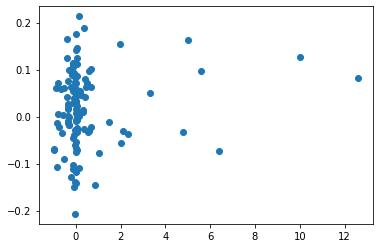

In [27]:
#scatter plot for risk premium of the stock and the market risk premium.
x = np.array(data['Market Premia'][1:])
y = np.array(data['Stock Premia'][1:])
plt.scatter(x,y)

In [28]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d = { "x": pd.Series(x), "y": pd.Series(y)}
df = pd.DataFrame(d)
mod = smf.ols('y ~ x', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.212
Date:                Sun, 07 Nov 2021   Prob (F-statistic):              0.140
Time:                        14:04:08   Log-Likelihood:                 133.17
No. Observations:                 119   AIC:                            -262.3
Df Residuals:                     117   BIC:                            -256.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0151      0.008      2.014      0.0

In [29]:
#time series regression with summary statistics
x = np.array(data['Market Premia'][1:]).reshape((-1,1))
y = np.array(data['Stock Premia'][1:]).reshape((-1,1))
model = LinearRegression()
model = model.fit(x,y)


In [30]:
comps = yf.download(f'{comp2},{comp3},{comp4}, ^IRX',start = start,end=end,interval = freq)
comps

[*********************100%***********************]  4 of 4 completed


Adj Close                                    Close             \
                  ADSK       CTSH        HPE   ^IRX        ADSK       CTSH   
Date                                                                         
2011-01-01   40.680000  34.602367        NaN  0.145   40.680000  36.474998   
2011-02-01   42.049999  36.461758        NaN  0.135   42.049999  38.435001   
2011-03-01   44.110001  38.610466        NaN  0.090   44.110001  40.700001   
2011-04-01   44.980000  39.321968        NaN  0.040   44.980000  41.450001   
2011-05-01   42.980000  36.068050        NaN  0.040   42.980000  38.020000   
...                ...        ...        ...    ...         ...        ...   
2020-08-01  245.699997  65.809509   9.229780  0.095  245.699997  66.860001   
2020-09-01  231.009995  68.554756   8.943438  0.085  231.009995  69.419998   
2020-10-01  235.539993  70.529823   8.351168  0.083  235.539993  71.419998   
2020-11-01  280.230011  77.156197  10.670937  0.075  280.230011  78.129997   
2020-12-01  305.339996  81.160477  11.453859  0.065  305.339996  81.949997   

                                High             ...     Low         \
              HPE   ^IRX        ADSK       CTSH  ...     HPE   ^IRX   
Date                                             ...                  
2011-01-01    NaN  0.145   42.320000  38.224998  ...     NaN  0.110   
2011-02-01    NaN  0.135   44.439999  38.869999  ...     NaN  0.075   
2011-03-01    NaN  0.090   44.430000  40.924999  ...     NaN  0.060   
2011-04-01    NaN  0.040   45.599998  41.615002  ...     NaN  0.015   
2011-05-01    NaN  0.040   46.150002  41.740002  ...     NaN  0.005   
...           ...    ...         ...        ...  ...     ...    ...   
2020-08-01   9.67  0.095  254.350006  68.680000  ...   9.120  0.075   
2020-09-01   9.37  0.085  261.940002  71.809998  ...   8.835  0.075   
2020-10-01   8.64  0.083  268.440002  76.449997  ...   8.285  0.080   
2020-11-01  11.04  0.075  282.489990  79.000000  ...   8.645  0.048   
2020-12-01  11.85  0.065  307.220001  82.730003  ...  11.000  0.060   

                  Open                               Volume               \
                  ADSK       CTSH    HPE   ^IRX        ADSK         CTSH   
Date                                                                       
2011-01-01   38.630001  37.070000    NaN  0.135  54281900.0   90624200.0   
2011-02-01   41.000000  36.680000    NaN  0.150  54287300.0   94836400.0   
2011-03-01   42.130001  38.525002    NaN  0.140  62006400.0  105667000.0   
2011-04-01   43.070000  40.915001    NaN  0.045  45234900.0   81631800.0   
2011-05-01   45.320000  41.724998    NaN  0.040  55348900.0  130665200.0   
...                ...        ...    ...    ...         ...          ...   
2020-08-01  239.419998  66.849998   9.87  0.083  25469000.0   45862300.0   
2020-09-01  247.990005  66.260002   9.67  0.100  32795700.0   67855700.0   
2020-10-01  232.759995  70.220001   9.43  0.088  31278000.0   83055600.0   
2020-11-01  237.199997  71.470001   8.79  0.083  31507300.0   52642700.0   
2020-12-01  281.869995  78.110001  11.14  0.080  27205300.0   59024000.0   

                              
                    HPE ^IRX  
Date                          
2011-01-01          NaN  0.0  
2011-02-01          NaN  0.0  
2011-03-01          NaN  0.0  
2011-04-01          NaN  0.0  
2011-05-01          NaN  0.0  
...                 ...  ...  
2020-08-01  212761400.0  0.0  
2020-09-01  239456800.0  0.0  
2020-10-01  218305500.0  0.0  
2020-11-01  242105300.0  0.0  
2020-12-01  222413400.0  0.0  

[132 rows x 24 columns]

In [31]:
#time series regression with summary statistics
print('Summary Statistics')
print('-'*100)
print(f'The number of observations in the regression is: ',len(data)-1)
print('The correlation of the risk premia of the market and your stock is: ',round(model.score(x,y)**(1/2),4))
print('The R-squared of the regression for the SCL is: ',round(model.score(x,y),3))
print('The Adjused R-squared of the regression for the SCL is: ',round(1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1),3))
print('The standard error of the regression is: ',round(res.scale**.5,5))
print('The t-test value of the beta is: ',round((res.params[1]-1)/res.bse[1],3))

Summary Statistics
----------------------------------------------------------------------------------------------------
The number of observations in the regression is:  119
The correlation of the risk premia of the market and your stock is:  0.1362
The R-squared of the regression for the SCL is:  0.019
The Adjused R-squared of the regression for the SCL is:  0.01
The standard error of the regression is:  0.0797
The t-test value of the beta is:  -250.383


In [32]:
comps.dropna(axis=0,how='all',inplace=True)
comps = pd.DataFrame(comps)
comps = pd.DataFrame(comps['Close'])
comps[:5]

,ADSK,CTSH,HPE,^IRX
Date,,,,
2011-01-01,40.680000,36.474998,NaN,0.145
2011-02-01,42.049999,38.435001,NaN,0.135
2011-03-01,44.110001,40.700001,NaN,0.090
2011-04-01,44.980000,41.450001,NaN,0.040
2011-05-01,42.980000,38.020000,NaN,0.040


In [33]:
comp2_ret = comps[f'{comp2}'].pct_change()
comp3_ret = comps[f'{comp3}'].pct_change()
comp4_ret = comps[f'{comp4}'].pct_change()
mark_ret = comps['^IRX'].pct_change()

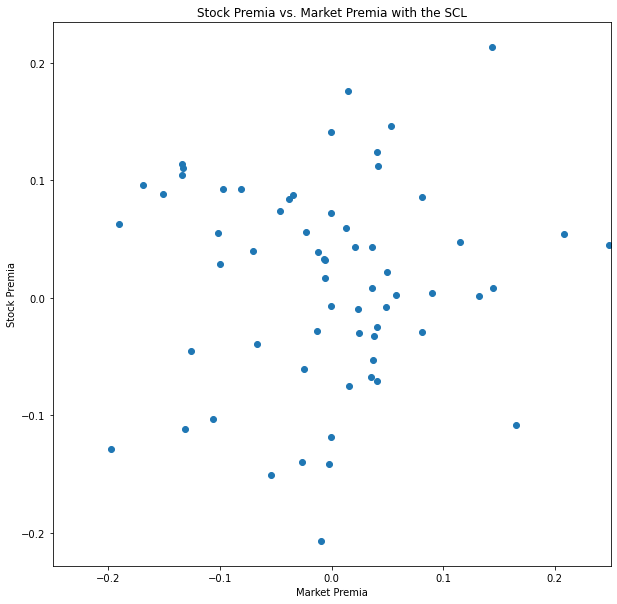

In [34]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.plot(x, y, 'o')
#predicted?
ax.set_title('Stock Premia vs. Market Premia with the SCL')
ax.set_xlabel('Market Premia')
ax.set_ylabel('Stock Premia')
ax.set_xlim([-.25,.25])
plt.show()

In [35]:
comps['^IRX'] = comps['^IRX']/100

In [36]:
comps['Comp2 Returns'] = comp2_ret
comps['Comp3 Returns'] = comp3_ret
comps['Comp4 Returns'] = comp4_ret
comps['Market Returns'] = mark_ret
comps['Comp2 Returns'] = comps['Comp2 Returns'].apply(lambda x: float(x))
comps['Comp3 Returns'] = comps['Comp3 Returns'].apply(lambda x: float(x))
comps['Comp4 Returns'] = comps['Comp4 Returns'].apply(lambda x: float(x))
comps['Market Returns'] = comps['Market Returns'].apply(lambda x: float(x))
comps['^IRX'] = comps['^IRX'].apply(lambda x: float(x))

In [37]:
comps['Comp2 Premia'] = comps['Comp2 Returns'] - comps['^IRX']
comps['Comp3 Premia'] = comps['Comp3 Returns'] - comps['^IRX']
comps['Comp4 Premia'] = comps['Comp4 Returns'] - comps['^IRX']
comps['Market Premia'] = comps['Market Returns'] - comps['^IRX']
comps.iloc[0:5]

,ADSK,CTSH,HPE,^IRX,Comp2 Returns,Comp3 Returns,Comp4 Returns,Market Returns,Comp2 Premia,Comp3 Premia,Comp4 Premia,Market Premia
Date,,,,,,,,,,,,
2011-01-01,40.680000,36.474998,NaN,0.00145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-01,42.049999,38.435001,NaN,0.00135,0.053736,NaN,0.033677,-0.068965,0.052386,NaN,0.032327,-0.070315
2011-03-01,44.110001,40.700001,NaN,0.00090,0.058931,NaN,0.048989,-0.333333,0.058031,NaN,0.048089,-0.334233
2011-04-01,44.980000,41.450001,NaN,0.00040,0.018428,NaN,0.019723,-0.555556,0.018028,NaN,0.019323,-0.555956
2011-05-01,42.980000,38.020000,NaN,0.00040,-0.082750,NaN,-0.044464,0.000000,-0.083150,NaN,-0.044864,-0.000400


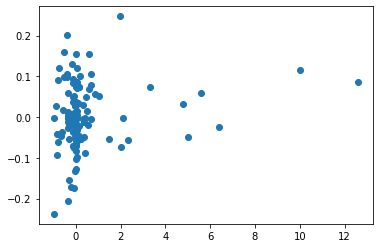

In [38]:
#scatter plot for risk premium of the stock and the market risk premium.
x = np.array(comps['Market Premia'][1:])
y2 = np.array(comps['Comp2 Premia'][1:])
plt.scatter(x,y2)

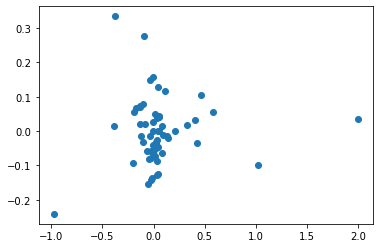

In [42]:
#time series regression with summary statistics
x = np.array(comps['Market Premia'][1:])
y3 = np.array(comps['Comp3 Premia'][1:])
plt.scatter(x,y3)

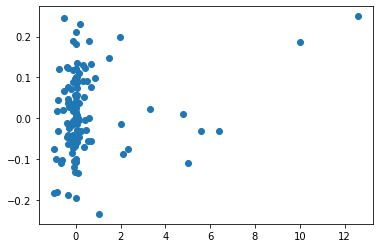

In [43]:
#scatter plot for risk premium of the stock and the market risk premium.
x = np.array(comps['Market Premia'][1:])
y4 = np.array(comps['Comp4 Premia'][1:])
plt.scatter(x,y4)

In [44]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d2 = { "x": pd.Series(x), "y2": pd.Series(y2)}
df2 = pd.DataFrame(d2)
mod = smf.ols('y2 ~ x', data=df2)
res = mod.fit()
print(res.summary())
coef2= res.params[1]
coef2

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.477
Date:                Sun, 07 Nov 2021   Prob (F-statistic):             0.0647
Time:                        14:05:20   Log-Likelihood:                 134.82
No. Observations:                 119   AIC:                            -265.6
Df Residuals:                     117   BIC:                            -260.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.007      0.131      0.8

0.007301091619806932

In [45]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d3 = { "x": pd.Series(x), "y3": pd.Series(y3)}
df3 = pd.DataFrame(d3)
mod = smf.ols('y3 ~ x', data=df3)
res = mod.fit()
print(res.summary())
coef3= res.params[1]
coef3

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2221
Date:                Sun, 07 Nov 2021   Prob (F-statistic):              0.639
Time:                        14:05:26   Log-Likelihood:                 57.341
No. Observations:                  61   AIC:                            -110.7
Df Residuals:                      59   BIC:                            -106.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0023      0.012     -0.181      0.8

0.016544890653059523

In [46]:
#time series regression with summary statistics
import statsmodels.formula.api as smf
d4 = { "x": pd.Series(x), "y4": pd.Series(y4)}
df4 = pd.DataFrame(d4)
mod = smf.ols('y4 ~ x', data=df4)
res = mod.fit()
print(res.summary())
coef4= res.params[1]
coef4

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.669
Date:                Sun, 07 Nov 2021   Prob (F-statistic):             0.0327
Time:                        14:05:29   Log-Likelihood:                 110.59
No. Observations:                 119   AIC:                            -217.2
Df Residuals:                     117   BIC:                            -211.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0115      0.009      1.267      0.2

0.010371270637139295

In [47]:
print(coef2, coef3, coef4)

0.007301091619806932 0.016544890653059523 0.010371270637139295


In [48]:
#unlever comp 1
unleveredbetac1= coef2/(1+(1-tax_rate)*deratio2)
print("The unlevered beta for comp 1 is ", round(unleveredbetac1,8))

The unlevered beta for comp 1 is  0.00505695


In [49]:
tax_rate=0.21

In [50]:
#unlever comp2
unleveredbetac2= coef3/(1+(1-tax_rate)*deratio3)
print("The unlevered beta for comp 2 is ", round(unleveredbetac2,8))

The unlevered beta for comp 2 is  0.00578273


In [51]:
#unlever comp 3
unleveredbetac3= coef4/(1+(1-tax_rate)*deratio4)
print("The unlevered beta is ", round(unleveredbetac3,8))

The unlevered beta is  0.00168186


In [52]:
compbeta_list = [unleveredbetac1, unleveredbetac2, unleveredbetac3]
compbeta = sum(compbeta_list)/len(compbeta_list)
print("The comparative beta is ", round(compbeta,8))

The comparative beta is  0.00417385


In [53]:
#calculate relevered beta
equitybeta= compbeta *(1+(1-tax_rate)*deratio)
print("The equity beta is ", round(equitybeta,8))

The equity beta is  0.0192213


In [54]:
#calculate cost of equity
costequity= riskfree + (equitybeta*(marketreturn-riskfree))
print("The cost of equity is ", costequity)


The cost of equity is  5.0
